<h1><center>Práctica Aprendizaje: Airbnb.</center></h1>

<h1><center>Análisis Exploratorio de los datos</center></h1>

# Introducción

- Conjunto de datos: El conjunto de datos escogido es éste, extraído de Airbnb mediante técnicas de scraping. Dentro de las opciones recomiendo utilizar el extract (“Only the 14780 selected records”), ya que minimiza el tiempo de ejecución y evita problemas de memoria en equipos con menos prestaciones. airbnb-listing-extract.csv
- Se busca crear un evaluador automático de precios a partir de las carácterísticas de los alojamientos. 

# 0. Librerías

In [1]:
# Paquetes y librerias
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt  

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Análisis exploratorio de los datos

## Selección de variables

Vamos a comenzar con una exploración previa de los datos por si fuera necesario realizar cambios o transformaciones en los mismos.

En primer lugar, cargamos los datos y miramos la dimensión y la estructura.

In [3]:
# Cargamos los datos
df = pd.read_csv("airbnb-listings-cleaned.csv")
df_original = df.copy()

df.head(5)

,id,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10080,none,30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",within a few hours,85%,NaN,f,...,f,f,strict_14_with_grace_period,f,f,31,31,0,0,0.18
1,11400,none,42305,Jaynne,2009-09-30,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,0.64
2,13188,none,51466,Family Guns,2009-11-04,"Vancouver, British Columbia, Canada",within an hour,100%,NaN,t,...,t,f,moderate,f,f,1,1,0,0,1.51
3,13357,none,52118,Liliana,2009-11-07,"Vancouver, British Columbia, Canada",within an hour,100%,NaN,f,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.51
4,13358,none,52116,Lynn,2009-11-07,"Vancouver, British Columbia, Canada",NaN,NaN,NaN,f,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.65


In [4]:
# Dimension de los datos
df.shape

(4837, 82)

Tenemos 4837 registros de 82 variables.

**Nota:** Agregar un README en github con descripción de las variables del dataframe y poner enlace

Vemos el tipo de las variables y si existen valores nulos.

In [5]:
# Tipo de las variables y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4837 entries, 0 to 4836
Data columns (total 82 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4837 non-null   int64  
 1   experiences_offered                           4837 non-null   object 
 2   host_id                                       4837 non-null   int64  
 3   host_name                                     4836 non-null   object 
 4   host_since                                    4836 non-null   object 
 5   host_location                                 4830 non-null   object 
 6   host_response_time                            2731 non-null   object 
 7   host_response_rate                            2731 non-null   object 
 8   host_acceptance_rate                          0 non-null      float64
 9   host_is_superhost                             4836 non-null   o

**Variables**

Variables que consideramos para el estudio cualitativo del host
- host_id
- host_since
- host_is_superhost
- host_verified
- 

Selección de variables para el modelo:
- latitude
- longitude
- room_type: tipo de habitación (privada o apartamento)
- accommodates: número de huéspedes
- bathrooms: número de baños
- bedrooms: número de habitaciones
- beds: número de camas
- security_deposit: depósito de seguro
- celaning_fee: 
- guests_inclueded
- extra_people
- minimum_nights
- maximum_nights
- availability_90
- number_of_reviews
- review_scores_rating 
- review_scores_accuracy                  
- review_scores_cleanliness                   
- review_scores_checkin                  
- review_scores_communication        
- review_scores_location         
- review_scores_value 
- reviews_per_month
- **price**: Esta es la variable target

In [6]:
# Creamos un dataframe para el estudio cualitativo el host
col_host = [0,2,3,4,5,6,7,9,10,11,12,13,14,72,73,74]
df_host = df.iloc[:,col_host]

df_host = df_host.set_index('id')
df_host.head()

,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,instant_bookable,is_business_travel_ready,cancellation_policy
id,,,,,,,,,,,,,,,
10080,30899,Rami,2009-08-10,"Vancouver, British Columbia, Canada",within a few hours,85%,f,Coal Harbour,31.0,31.0,t,t,f,f,strict_14_with_grace_period
11400,42305,Jaynne,2009-09-30,"Vancouver, British Columbia, Canada",NaN,NaN,f,Riley Park,1.0,1.0,t,t,f,f,strict_14_with_grace_period
13188,51466,Family Guns,2009-11-04,"Vancouver, British Columbia, Canada",within an hour,100%,t,Riley Park,1.0,1.0,t,t,t,f,moderate
13357,52118,Liliana,2009-11-07,"Vancouver, British Columbia, Canada",within an hour,100%,f,Chinatown,4.0,4.0,t,t,f,f,strict_14_with_grace_period
13358,52116,Lynn,2009-11-07,"Vancouver, British Columbia, Canada",NaN,NaN,f,Downtown Vancouver,1.0,1.0,t,f,f,f,strict_14_with_grace_period


In [7]:
# Dataframe para el estudio
cols = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,29,35,36,38,39,46,47,48,49,50,51,52,53,55,56,57,58,
        60,61,62,70,71,72,73,74,75,76,77,78,79,80,81]

# Eliminamos las variables
df = df.drop(df.columns[cols],axis = 1)
df.columns

Index(['id', 'latitude', 'longitude', 'is_location_exact', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [8]:
# Comprobamos que el indice es valido
df['id'].isnull().sum()
df['id'].duplicated().sum()

# Cambiamos el indice
df = df.set_index('id')

In [9]:
df.head(5)

,latitude,longitude,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,...,maximum_nights,availability_30,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,,,,,,,,,,,,,,,
10080,49.287716,-123.121103,t,Entire home/apt,6,2.0,2.0,4.0,295.0,0.0,...,1124,0,16,93.0,9.0,9.0,10.0,9.0,10.0,9.0
11400,49.253756,-123.112659,t,Private room,1,1.0,1.0,1.0,60.0,NaN,...,364,30,70,92.0,9.0,10.0,10.0,10.0,10.0,9.0
13188,49.245770,-123.105158,t,Entire home/apt,4,1.0,0.0,2.0,119.0,0.0,...,1125,23,165,96.0,10.0,10.0,10.0,10.0,10.0,10.0
13357,49.279548,-123.105457,t,Entire home/apt,4,2.0,2.0,2.0,151.0,787.0,...,30,27,56,84.0,8.0,9.0,8.0,8.0,8.0,8.0
13358,49.282090,-123.125150,t,Entire home/apt,2,1.0,1.0,1.0,119.0,300.0,...,60,5,384,94.0,10.0,10.0,10.0,10.0,10.0,9.0


Realizamos algunas modificaciones sobre las varibles:

En primer lugar, sobre el dataframe relativo al host

In [14]:
df_host

,host_id,host_name,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,instant_bookable,is_business_travel_ready,cancellation_policy,host_for
id,,,,,,,,,,,,,,,
10080,30899,Rami,"Vancouver, British Columbia, Canada",within a few hours,0.85,0.0,Coal Harbour,31.0,31.0,1.0,1.0,0,0,strict_14_with_grace_period,10.0
11400,42305,Jaynne,"Vancouver, British Columbia, Canada",NaN,NaN,0.0,Riley Park,1.0,1.0,1.0,1.0,0,0,strict_14_with_grace_period,10.0
13188,51466,Family Guns,"Vancouver, British Columbia, Canada",within an hour,1.00,1.0,Riley Park,1.0,1.0,1.0,1.0,1,0,moderate,10.0
13357,52118,Liliana,"Vancouver, British Columbia, Canada",within an hour,1.00,0.0,Chinatown,4.0,4.0,1.0,1.0,0,0,strict_14_with_grace_period,10.0
13358,52116,Lynn,"Vancouver, British Columbia, Canada",NaN,NaN,0.0,Downtown Vancouver,1.0,1.0,1.0,0.0,0,0,strict_14_with_grace_period,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32135798,125368592,James,CA,within an hour,1.00,0.0,Downtown Vancouver,4.0,4.0,1.0,0.0,0,0,flexible,2.0
32151243,241187818,Cheung,CA,NaN,NaN,0.0,Downtown Vancouver,1.0,1.0,1.0,0.0,1,0,flexible,0.0
32152929,48291360,Craig,US,within an hour,1.00,0.0,Marpole,3.0,3.0,1.0,1.0,0,0,flexible,4.0


In [11]:
# Nos quedamos solo con el año de host_since 
df_host['host_since'] = pd.to_datetime(df_host['host_since'], errors='coerce')
df_host['host_since'] = df_host['host_since'].dt.year
df_host['host_for'] = 2019 - df_host['host_since'].values
df_host.drop(['host_since'], axis = 1, inplace = True)

In [12]:
# Cambiamos variables dicotomicas a binario 1:t y 0:f
df_host['host_is_superhost'] = df_host['host_is_superhost'].map({"t":1, "f":0})
df_host['host_has_profile_pic'] = df_host['host_has_profile_pic'].map({"t":1, "f":0})
df_host['host_identity_verified'] = df_host['host_identity_verified'].map({"t":1, "f":0})
df_host['instant_bookable'] = df_host['instant_bookable'].map({"t":1, "f":0})
df_host['is_business_travel_ready'] = df_host['is_business_travel_ready'].map({"t":1, "f":0})

In [13]:
# Cambiamos host_response_time a tasa
df_host['host_response_rate'] = df_host['host_response_rate'].str.replace('%','').astype('float64')
df_host['host_response_rate'] = df_host['host_response_rate']/100

In [22]:
df_host.head(2)

,host_id,host_name,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,instant_bookable,is_business_travel_ready,cancellation_policy,host_for
id,,,,,,,,,,,,,,,
10080,30899,Rami,"Vancouver, British Columbia, Canada",within a few hours,0.85,0.0,Coal Harbour,31.0,31.0,1.0,1.0,0,0,strict_14_with_grace_period,10.0
11400,42305,Jaynne,"Vancouver, British Columbia, Canada",NaN,NaN,0.0,Riley Park,1.0,1.0,1.0,1.0,0,0,strict_14_with_grace_period,10.0


Continuamos con el dataframe de estudio, df

Para las localizaciones (latitude,longitude) tenemos dos opciones:

- Considerar que las localizaciones que tienen valor 'f' en la variable *is_location_exact* no son válidas y, o bien eliminarlas o imputarlas 
- Considerar que, dado que no hay valores duplicados en las localizaciones, aunque no sea exacta se encontrará en el área y tomarlas como válidas.

In [16]:
# Si la localizacion no esta verificada ponemos NaN
df.loc[df['is_location_exact'] != 't', ['latitude', 'longitude']] = np.nan
df = df.dropna(subset=['latitude', 'longitude']) # si queremos quitar las localizaciones no verificadas
df.drop(['is_location_exact'], axis = 1, inplace = True)

In [17]:
# Cambiamos la variable room_type a dummies segun las 3 categorias
df['room_type'].value_counts()
df_rooms = pd.get_dummies(df[['room_type']], prefix = "", prefix_sep = "")
df = pd.concat([df,df_rooms], axis=1)
df.drop(['room_type'], axis = 1, inplace = True)

In [18]:
# Cambiamos extra_people a dtype=float64
df['extra_people'] = df['extra_people'].str.replace('$','').astype('float64')

In [20]:
df.head(2)

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Entire home/apt,Private room,Shared room
id,,,,,,,,,,,,,,,,,,,,,
10080,49.287716,-123.121103,6,2.0,2.0,4.0,295.0,0.0,195.0,1,...,93.0,9.0,9.0,10.0,9.0,10.0,9.0,1,0,0
11400,49.253756,-123.112659,1,1.0,1.0,1.0,60.0,NaN,NaN,1,...,92.0,9.0,10.0,10.0,10.0,10.0,9.0,0,1,0


## Análisis descriptivo

**Estudio cualitativo del host**

Podemos estudiar:
- ¿Existen variables influyentes que determinen si un host es superhost?
- Mapa de localización de los host

**Estudio de las variables para los modelos de machine learning**

Vemos algunos estadísticos de los datos y estudiamos la distribución de las variables.

In [27]:
# Estadisticos descriptivos
df.drop(columns=['latitude', 'longitude']).iloc[:,0:12].describe()

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30
count,4013.000000,4013.000000,4011.000000,4010.000000,4013.000000,3416.000000,3681.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000
mean,3.563170,1.330551,1.487410,1.891272,165.240718,375.312646,81.350992,1.920010,15.888612,13.163967,686.478445,11.569150
std,2.382285,0.681213,1.087691,1.293208,205.623429,516.012915,61.807099,1.567151,26.329216,33.165384,1690.439572,11.186759
min,1.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,80.000000,0.000000,39.000000,1.000000,0.000000,2.000000,48.000000,0.000000
50%,3.000000,1.000000,1.000000,1.000000,119.000000,250.000000,70.000000,1.000000,10.000000,2.000000,1124.000000,8.000000
75%,4.000000,1.500000,2.000000,2.000000,198.000000,500.000000,100.000000,2.000000,25.000000,30.000000,1125.000000,22.000000
max,16.000000,8.000000,30.000000,25.000000,6500.000000,6561.000000,500.000000,16.000000,396.000000,998.000000,99999.000000,30.000000


In [28]:
# Estadisticos descriptivos
df.drop(columns=['latitude', 'longitude']).iloc[:,12:].describe()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Entire home/apt,Private room,Shared room
count,4013.000000,3439.000000,3438.000000,3439.000000,3437.000000,3437.000000,3437.000000,3437.000000,4013.000000,4013.000000,4013.000000
mean,33.782208,94.628962,9.705352,9.523699,9.791097,9.808845,9.673262,9.425080,0.712185,0.279342,0.008472
std,51.558086,6.867366,0.687077,0.839648,0.553854,0.576866,0.600270,0.785854,0.452801,0.448732,0.091667
min,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,3.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,0.000000
50%,14.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000
75%,43.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000
max,544.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000


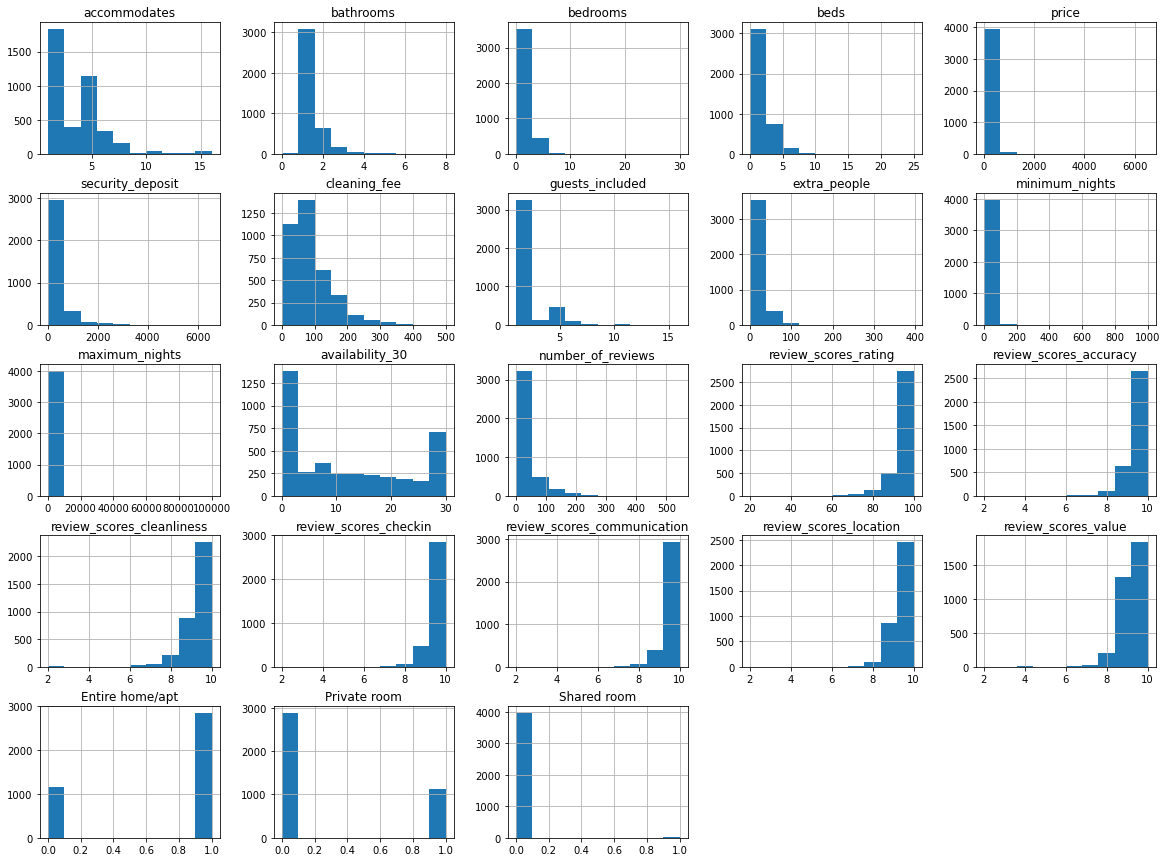

In [29]:
# Histograma de las variables
df.drop(columns=['latitude', 'longitude']).hist(figsize=(20,15))
plt.show()

## Imputación de missings

In [30]:
# Valores missing
df.isnull().sum()

latitude                         0
longitude                        0
accommodates                     0
bathrooms                        0
bedrooms                         2
beds                             3
price                            0
security_deposit               597
cleaning_fee                   332
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
availability_30                  0
number_of_reviews                0
review_scores_rating           574
review_scores_accuracy         575
review_scores_cleanliness      574
review_scores_checkin          576
review_scores_communication    576
review_scores_location         576
review_scores_value            576
Entire home/apt                  0
Private room                     0
Shared room                      0
dtype: int64

**Imputación de missings para varibales bedrooms y beds mediante regresión lienal**

In [31]:
# Librerias
from sklearn.linear_model import LinearRegression

En primer lugar, imputamos la varibale *bedrooms*

In [32]:
# Separamos las variables
target = 'bedrooms'
features = ['accommodates', 'bathrooms']

# Creamos un dataframe con las variables seleccionadas
df_selected = df[[target] + features]

# Separamos los datos en dos dataframe, uno con los valores missing y otro sin valores missing
df_missing = df_selected[df_selected.isnull().any(axis=1)]
df_not_missing = df_selected.dropna()

# Ajustamos el modelo a los datos sin missing
regression_model = LinearRegression()
regression_model.fit(df_not_missing[features], df_not_missing[target])

# Realizamos la imputacion de los valores missing y almacenamos los valores obtenidos en el dataframe 
missing_pred = regression_model.predict(df_missing[features])
df.loc[df[target].isnull(), target]= missing_pred

Imputamos los missing en la variable *beds*

In [33]:
# Separamos las variables
target = 'beds'
features = ['accommodates', 'bathrooms']

# Creamos un dataframe con las variables seleccionadas
df_selected = df[[target] + features]

# Separamos los datos en dos dataframe, uno con los valores missing y otro sin valores missing
df_missing = df_selected[df_selected.isnull().any(axis=1)]
df_not_missing = df_selected.dropna()

# Ajustamos el modelo a los datos sin missing
regression_model = LinearRegression()
regression_model.fit(df_not_missing[features], df_not_missing[target])

# Realizamos la imputacion de los valores missing y almacenamos los valores obtenidos en el dataframe 
missing_pred = regression_model.predict(df_missing[features])
df.loc[df[target].isnull(), target]= missing_pred

**Imputación de missings para varibales security_deposit y cleaning_fee mediante KNN**

In [35]:
df[(df['security_deposit']==0) | (df['cleaning_fee']==0)][['price','security_deposit', 'cleaning_fee']].head()

,price,security_deposit,cleaning_fee
id,,,
10080,295.0,0.0,195.0
13188,119.0,0.0,40.0
13490,146.0,0.0,40.0
14267,140.0,0.0,60.0
16254,220.0,400.0,0.0


Tenemos dos opciones:
- Considerar que los valores NaN son 0, es decir, tendrían sentido y sería que no se paga depósito ni tasas de limpieza. Sin embargo, existen valores tanto 0.0 como missing en el dataframe por lo que resulta más conveninente diferenciar ambos.
- Imputar los valores missing por medio de KNN.

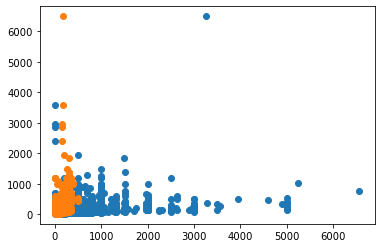

In [36]:
# Visualizacmos los puntos en funcion del precio para ver si existen patrones
plt.scatter(df['security_deposit'], df['price'])
plt.scatter(df['cleaning_fee'], df['price'])

In [37]:
# Librerias
from sklearn.impute import KNNImputer

In [38]:
# Imputacion de missing
imputer = KNNImputer(n_neighbors=5) 
df[['price','security_deposit', 'cleaning_fee']] = pd.DataFrame(imputer.fit_transform(df[['price', 'security_deposit', 'cleaning_fee']]),
                                                        columns=df[['price','security_deposit', 'cleaning_fee']].columns, 
                                                        index=df[['price', 'security_deposit', 'cleaning_fee']].index)

**Imputación de missing para variables ratings**

In [40]:
df_selected = df[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication','review_scores_location', 'review_scores_value']]
df_selected[df_selected.isna().any(axis=1)].head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,
48146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1126273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1229714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1620084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1660055,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Así, decidimos eliminar las 576 observaciones

In [41]:
df = df.dropna(subset=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication','review_scores_location', 'review_scores_value'])
df.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Entire home/apt,Private room,Shared room
id,,,,,,,,,,,,,,,,,,,,,
10080,49.287716,-123.121103,6,2.0,2.0,4.0,295.0,0.0,195.0,1,...,93.0,9.0,9.0,10.0,9.0,10.0,9.0,1,0,0
11400,49.253756,-123.112659,1,1.0,1.0,1.0,60.0,270.0,21.0,1,...,92.0,9.0,10.0,10.0,10.0,10.0,9.0,0,1,0
13188,49.245770,-123.105158,4,1.0,0.0,2.0,119.0,0.0,40.0,1,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0
13357,49.279548,-123.105457,4,2.0,2.0,2.0,151.0,787.0,197.0,2,...,84.0,8.0,9.0,8.0,8.0,8.0,8.0,1,0,0
13358,49.282090,-123.125150,2,1.0,1.0,1.0,119.0,300.0,65.0,1,...,94.0,10.0,10.0,10.0,10.0,10.0,9.0,1,0,0


Comprobamos que ya no existen más valores missing en el dataframe

In [44]:
df.isnull().sum()

latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
price                          0
security_deposit               0
cleaning_fee                   0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
availability_30                0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
Entire home/apt                0
Private room                   0
Shared room                    0
dtype: int64

## Outliers

Estudiamos los outliers en conjunto con aquellas variables con las que podrían tener más relación. La relación entre las variables podemos estudiarla mediante la matriz de correlaciones

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Entire home/apt,Private room,Shared room
latitude,1.000000,-0.089268,-0.076899,-0.046897,-0.145387,-0.099587,0.089945,0.116835,0.149788,-0.065050,...,0.055561,0.023893,0.005993,-0.056815,0.022680,0.179935,-0.032360,0.254959,-0.264827,0.038250
longitude,-0.089268,1.000000,-0.040971,-0.101882,-0.030723,-0.026047,-0.166121,-0.058299,-0.137198,-0.013288,...,0.025809,0.025612,0.051404,0.029539,0.018109,-0.278852,0.058585,-0.045668,0.036184,0.049361
accommodates,-0.076899,-0.040971,1.000000,0.540666,0.810904,0.813846,0.556917,0.228008,0.518489,0.576708,...,-0.024864,-0.079538,-0.026987,-0.041918,-0.022610,0.030900,-0.032995,0.412144,-0.403296,-0.062069
bathrooms,-0.046897,-0.101882,0.540666,1.000000,0.622035,0.506562,0.503204,0.263007,0.473306,0.334327,...,-0.011769,-0.088037,-0.054981,-0.056017,-0.037592,0.043484,-0.040271,0.119874,-0.130888,0.049829
bedrooms,-0.145387,-0.030723,0.810904,0.622035,1.000000,0.765678,0.547326,0.235829,0.517846,0.519676,...,-0.003902,-0.066829,-0.036597,-0.008747,-0.006642,0.012063,-0.017682,0.274661,-0.268329,-0.043542
beds,-0.099587,-0.026047,0.813846,0.506562,0.765678,1.000000,0.497289,0.207852,0.466255,0.522105,...,-0.011239,-0.057247,-0.014989,0.000198,0.001413,0.010256,-0.027158,0.330075,-0.329237,-0.018496
price,0.089945,-0.166121,0.556917,0.503204,0.547326,0.497289,1.000000,0.280969,0.535770,0.379496,...,0.062311,0.006118,0.020310,-0.018329,0.021528,0.102103,-0.028743,0.336803,-0.330343,-0.046877
security_deposit,0.116835,-0.058299,0.228008,0.263007,0.235829,0.207852,0.280969,1.000000,0.375824,0.156559,...,0.045329,-0.002047,0.027346,-0.017238,-0.009013,0.045496,-0.028122,0.211718,-0.204614,-0.044672
cleaning_fee,0.149788,-0.137198,0.518489,0.473306,0.517846,0.466255,0.535770,0.375824,1.000000,0.329521,...,0.056867,-0.017870,0.039565,-0.022510,0.004981,0.103954,-0.055134,0.438469,-0.427034,-0.076138
guests_included,-0.065050,-0.013288,0.576708,0.334327,0.519676,0.522105,0.379496,0.156559,0.329521,1.000000,...,0.004683,-0.025881,0.011165,0.010709,0.010050,-0.002396,0.007583,0.262203,-0.255899,-0.042860


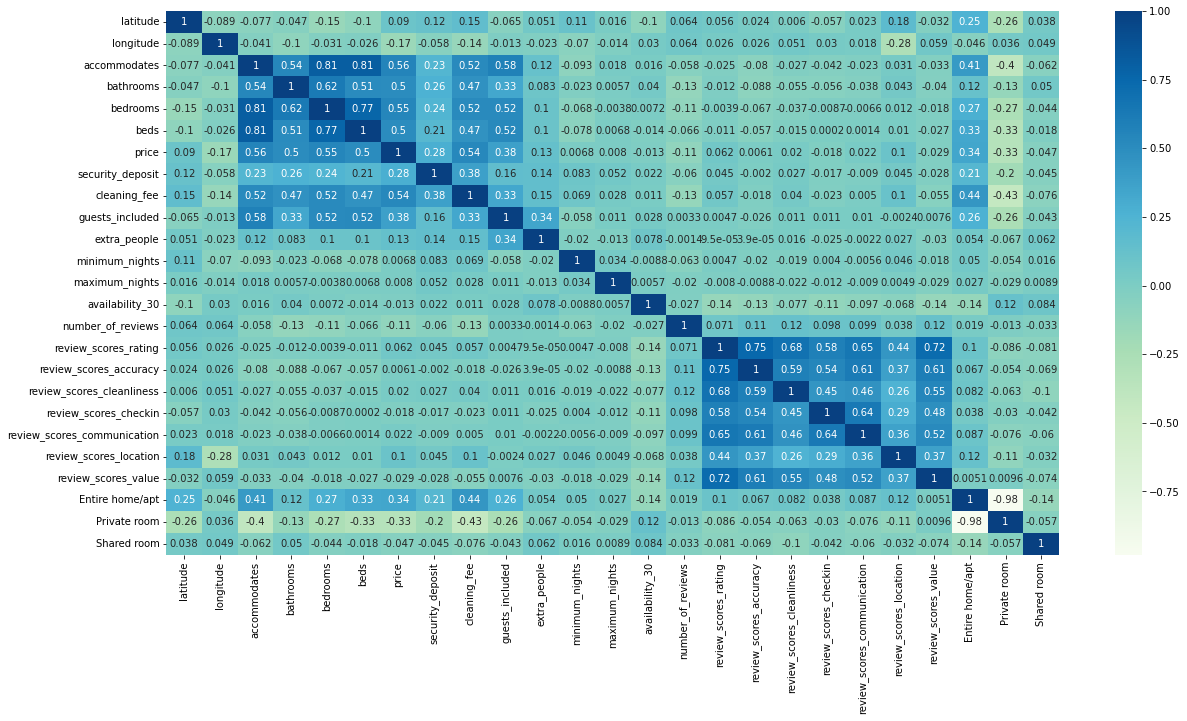

In [48]:
plt.figure(figsize=(20,10))
correlaciones= df.corr()
sns.heatmap(correlaciones,cmap="GnBu",annot=True) 
correlaciones

Primero vamos a estudiar los outliers en las variables relativas al número de habitaciones

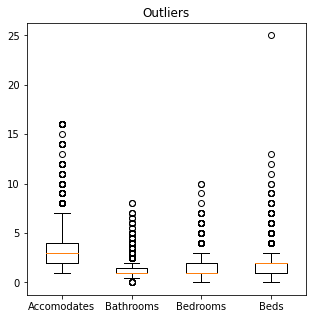

In [49]:
# Box plot de las habitaciones
fig = plt.figure(figsize = (5,5))

plt.boxplot(df[['accommodates', 'bathrooms','bedrooms', 'beds']])

plt.title('Outliers')
plt.xticks([1,2,3,4], ['Accomodates', 'Bathrooms', 'Bedrooms', 'Beds'])

plt.show()

Estudiamos los outliers en conjunto. Para ello empleamos la librería *PyOD* que posee estrategias para detectar outliers. En este caso, empleamos el algoritmo de KNN

In [50]:
#!pip install pyod --user

In [51]:
# Librerias
from pyod.models.knn import KNN

In [52]:
# Deteccion de outliers
A = df[['accommodates', 'bathrooms','bedrooms', 'beds']]
clf = KNN(contamination=0.1)
clf.fit(A)
y_pred = clf.predict(A)
A[y_pred == 1]

,accommodates,bathrooms,bedrooms,beds
id,,,,
256178,7,1.0,2.0,4.0
303950,5,3.5,3.0,3.0
311354,7,1.0,3.0,3.0
363705,3,2.0,1.0,2.0
461370,5,1.0,1.0,1.0
...,...,...,...,...
31523939,16,2.0,6.0,13.0
31741579,16,2.0,3.0,4.0
31900229,9,1.0,2.0,4.0


**Nota**: Estudiar qué hacer con los outliers

Podemos hacer lo mismo con las varibales relativas a un pago extra/invitados/deposito etc

In [53]:
df['guests_included'].value_counts() # Para ver valores atipicos de guests_included

df[df['guests_included']>=8][['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
                              'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people']] # Para ver en conjunto

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people
id,,,,,,,,,
1032892,2,1.0,1.0,1.0,94.0,0.0,20.0,15,15.0
4947735,10,3.0,5.0,6.0,600.0,1000.0,275.0,8,50.0
5698137,5,2.0,3.0,3.0,600.0,500.0,200.0,10,0.0
7146259,14,4.0,5.0,9.0,299.0,1500.0,99.0,8,15.0
14090993,8,5.0,5.0,6.0,295.0,525.0,197.0,12,26.0
14744175,9,2.0,3.0,4.0,323.0,379.8,90.0,8,50.0
15735770,14,3.0,5.0,10.0,300.0,500.0,195.0,10,10.0
16339748,11,3.0,4.0,6.0,600.0,0.0,180.0,11,25.0
19486839,8,2.0,4.0,6.0,320.0,500.0,170.0,8,25.0


In [54]:
# Si guests_included > accommodates --> esta mal la entrada y la eliminamos
df[df['guests_included']>df['accommodates']][['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
                              'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people']]

df = df.drop(df[df['guests_included']>df['accommodates']].index)

<AxesSubplot:xlabel='security_deposit', ylabel='Density'>

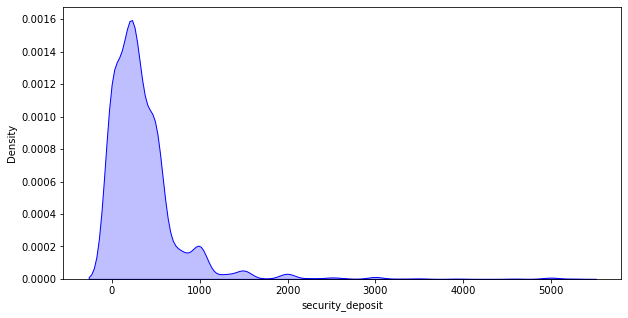

In [55]:
fig, ax = plt.subplots(1,figsize=(10, 5))

sns.kdeplot(df['security_deposit'], shade=True, color='blue', label='sqft_living', ax=ax)

En el siguiente dataframe podemos ver que valores altos de la variable security_posit están relacionador con largas estancias, y generalmente el tipo de habitación en la que se reside es un apartamento entero. Por tanto, no sería conveniente tratarlos como outliers

In [56]:
df[df['security_deposit']>2000][['price','minimum_nights', 'maximum_nights','Entire home/apt', 'Private room',
       'Shared room']]

,price,minimum_nights,maximum_nights,Entire home/apt,Private room,Shared room
id,,,,,,
507767,230.0,31,10000,1,0,0
771380,350.0,31,10000,1,0,0
1820919,500.0,90,700,1,0,0
3309313,350.0,31,10000,1,0,0
3594666,510.0,30,1125,1,0,0
3887660,175.0,30,1124,1,0,0
4195069,499.0,7,120,1,0,0
5325269,157.0,60,1123,1,0,0
5863875,199.0,30,45,1,0,0


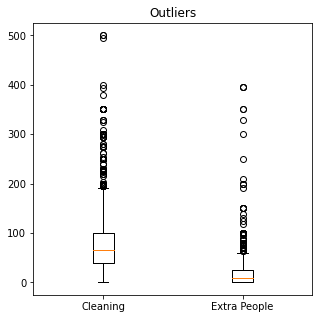

In [57]:
# Box plot extras
fig = plt.figure(figsize = (5,5))

plt.boxplot(df[['cleaning_fee','extra_people']])

plt.title('Outliers')
plt.xticks([1,2], ['Cleaning', 'Extra People'])

plt.show()

## Algunos gráficos interesantes

Ahora vamos a estudiar algunas relaciones existentes entre las variables y *price*

En primer lugar, podemos ver cómo influye el número de habitaciones y baños en el precio de la casa mediante un boxplot.

In [ ]:
# Boxplot entre bedrooms y log-price
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(x=df['bedrooms'], y=df['price'], data = df, ax = ax)

plt.xlabel('Bedrooms')
plt.ylabel('log Price')
plt.title('Boxplot bedrooms vs price')

plt.show()

In [ ]:
# Boxplot entre bathrooms y logprice
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(x=df['bathrooms'], y=df['price'], data = df, ax = ax)

plt.xlabel('Bathrooms')
plt.ylabel('log Price')
plt.title('Boxplot bathrooms vs price')

plt.show()

También podemos ver como aumenta el precio a medida que aumenta la superficie habitable de la casa.

In [ ]:
# Grafico de dispersion sqft_living vs. price
fig,ax = plt.subplots(figsize=(10,5))

ax.scatter(x=df['sqft_living'].values, y = df['price'].values)

ax.set_xlabel('Sqft Living')
ax.set_ylabel('log Price')
plt.title('Sqft vs Price')

plt.show()

Además, también puede ser interesante estudiar si existe alguna relación entre las componentes de geolocalización y el precio de las casas.

Podemos comenzar estudiando las variables longitud y latitud de la casa por separado.

In [ ]:
# Grafico de dispersion long /lat vs. price
fig,ax = plt.subplots(2, figsize=(10,5))

ax[0].scatter(x=df['long'].values, y = df['price'].values)
ax[1].scatter(x=df['lat'].values, y = df['price'].values)

ax[0].set_xlabel('Long')
ax[0].set_ylabel('log Price')
ax[1].set_xlabel('Lat')
ax[1].set_ylabel('log Price')

plt.suptitle('Long / Lat vs Price')

plt.show()

También, podemos tratar la latitud y longitud conjutamente creando puntos en el espacio.

In [ ]:
# !pip install geopandas

In [ ]:
# Librerias
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
# Mapa de King County, Washington
street_map = gpd.read_file('./Incorporated_Areas_of_King_County/Incorporated_Areas_of_King_County___citydst_area.shp')
# Creamos GeoPandas Data Frame
# Sistema de coordenadas 
crs = {'init':'epsg:4326'}
# Puntos de coordenadas
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
# DataFrame geoPandas
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry = geometry)

In [ ]:
# Grafico de long/lat vs price
fig,ax = plt.subplots(figsize=(10,10))

street_map.plot(ax=ax, alpha=0.4,color='grey') 
geo_df.plot(column='price',ax=ax, alpha=1,legend=True,markersize=10)

plt.title('Precio de las viviendas en WA', fontsize=15)
plt.xlim(-122.6,-121.0)
plt.ylim(47.1,47.8)

plt.show()

Podemos observar que las viviendas situadas al norte tienen un mayor precio.

## Análisis de correlaciones

Para finalizar, estudiamos las correlaciones entre las variables. Así, podemos decidir qué variables usar para el modelo y estudiar posibles relaciones existentes entre ellas.

In [ ]:
plt.figure(figsize=(20,10))
correlaciones= df.corr()
sns.heatmap(correlaciones,cmap="GnBu",annot=True) 
correlaciones

Así, seleccionamos las siguientes variables para el modelo:
Las variables de modelización:
* _bedrooms_ 
* _bathrooms_ 
* _sqft_living_
* _sqft_lot_
* _view_
* _condition_
* _grade_
* _lat_
* _long_

Además, podemos considerar crear dos variables. Por un lado, *bed&bath*, que incluya en una única variable el número de baños y habitaciones de la casa (pues tienen una alta correlación). Por otro lado, podría ser más interesante trabajar con una variable que definimos como *total_yrs* = *current_year* (2023) - *yr_built*

Y la varibale de etiqueta:
* _logPrice_

Así, nos queda el siguiente DataFrame

In [ ]:
# Creamos las nuevas variables
bed_and_bath = df['bedrooms'] + df['bathrooms']
total_yrs = 2023 - df['yr_built']

In [ ]:
# DataFrame final 
df = df.drop(columns=['date','bedrooms','bathrooms','floors','waterfront','grade','sqft_above','sqft_basement','yr_built','zipcode','sqft_living15','sqft_lot15','geometry'], axis = 1)
df['bed_and_bath'] = bed_and_bath
df['total_yrs'] = total_yrs
df.head()

# 2. División de los datos

In [ ]:
# Paquetes y liberias
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

En primer lugar, creamos la matriz de observaciones y el vector etiqueta con los que trabajaremos para ajustar el modelo de regresión lineal.

In [ ]:
# Vector etiqueta
y = df['price']

# Matriz de observaciones
X = df.drop('price',axis=1)

In [ ]:
# Variables dummy para view y condition (son categoricas)
X = pd.get_dummies(X, columns=['view', 'condition'], drop_first=True)

In [ ]:
# Estandarizamos los datos
objeto = StandardScaler()
X_ss = pd.DataFrame(objeto.fit_transform(X.iloc[:,0:6]), columns=list(X.iloc[:,0:6].columns))
# Concatenamos los datos
X = pd.concat([X_ss, X.loc[:,'view_1':'condition_5'].reset_index()], axis=1)
X.head(5)

Para ajustar los distintos modelos tenemos 2 opciones:
1. Plantear un problema de regresión donde la variable *y* es de tipo continuo
2. Plantear un problema de clasificación donde agrupamos en diferentes cluster los valores de la variable *y*

In [ ]:
# Realizamos un describe para saber como separar los datos
y.describe()

In [ ]:
# Problema de clasificacion
y_clas = pd.qcut(y, 3, labels=False)

# Hallamos los rangos de valores para las diferentes categorias
quantiles = pd.qcut(y, 3).unique().sort_values()
print(quantiles)

Donde las clases serían:
$0:\text{Barato} \in (11.224, 12.78]$;
$1:\text{Medio} \in (12.78, 13.218]$;
$2:\text{Caro} \in (13.218, 14.897]$

Separamos los datos en train y test

In [ ]:
X_train, X_test, y_train, y_test, y_train_clas, y_test_clas = train_test_split(X, y, y_clas, test_size=0.3, random_state=0)

In [ ]:
# Librerias
import os

# Carpeta con datos
if not os.path.exists('Datos'):
    os.makedirs('Datos')
    
# Guardamos los datos
X_train.to_csv('Datos/X_train.csv', index=False)
X_test.to_csv('Datos/X_test.csv', index=False)
y_train.to_csv('Datos/y_train.csv', index=False)
y_test.to_csv('Datos/y_test.csv', index=False)
y_train_clas.to_csv('Datos/y_train_clas.csv', index=False)
y_test_clas.to_csv('Datos/y_test_clas.csv', index=False)